In [ ]:
import pandas as pd 

In [42]:
import numpy as np

In [43]:
df=pd.read_csv('data.csv')

In [44]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [45]:
col_to_drop=['brand_name','predicted_category_name','predicted_subcategory_name','ad_revenue','savings','savings_with_pass']
df = df.drop(columns=col_to_drop)

In [46]:
df.head()

,search_term,product_variant_id,city_id,query_type,is_clicked,total_clicks,session_views,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,CTR_product_30_days,query_product_plt_clicks_60_days,query_product_plt_ctr_60_days,CTR_plt_30_days,query_product_plt_clicks_30_days,product_name,category_name,subcategory_name,latest_margin,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity
0,akshayakalpa milk,c442ad9b-09b6-4505-a17d-7d2b3cceee0e,ee66dc2a-aded-4445-a7b2-1ad63715725c,head,0.0,0,0,0,0.000000,0.0,0.000000,0,0.00000,0.234505,0,Cadbury Dairy Milk Chocolate Bar,Sweet Cravings,Chocolates,6.900000,155,376,552508,167494,0.054913,0.384844
1,ice cubes,33e1c372-8f6b-4312-b4df-93911f4c1caf,7e926d2f-adad-4e5a-956f-f07fffa54164,head,0.0,0,57,0,0.000000,0.0,0.003239,0,0.00000,0.011633,0,Noto Roasted Hazelnut Bar Ice Cream Stick,Ice Creams & More,Sticks,42.010000,14,41,3264,1313,0.003239,0.324977
2,protien,8ed8801e-f3bd-46ed-a212-24dcaa33d937,078d5e32-627a-4907-8df8-4360bc7c06da,head,1.0,29,545,9,0.040179,0.0,0.061085,317,0.05352,0.066489,198,RiteBite Max Protein Cookies Choco Chips Biscu...,Munchies,Energy Bars,10.243929,1469,3335,55215,24085,0.061085,0.220603
3,comb,b16224dd-5b0b-4e39-91d0-b52e563c70c2,4f30407c-6a3c-4a4e-8a3d-652217d4b6cb,head,0.0,0,13,0,0.000000,0.0,0.000000,0,0.00000,0.258667,0,Bisleri Packaged Drinking Water Jar,Cold Drinks & Juices,Water,21.433421,14567,28849,216304,121334,0.120340,0.061622
4,nail polish remover,25efac15-9a86-4da1-ab36-94e32bc7ecd9,4f30407c-6a3c-4a4e-8a3d-652217d4b6cb,tail,0.0,0,1,0,0.000000,0.0,0.052714,0,0.00000,0.000000,0,Veet Hair Removal Wax Strips - Sensitive Skin,Feminine Hygiene,Hair Removal,13.487105,1043,2446,14527,6418,0.052714,0.390254


In [47]:
# df.dropna()

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns 

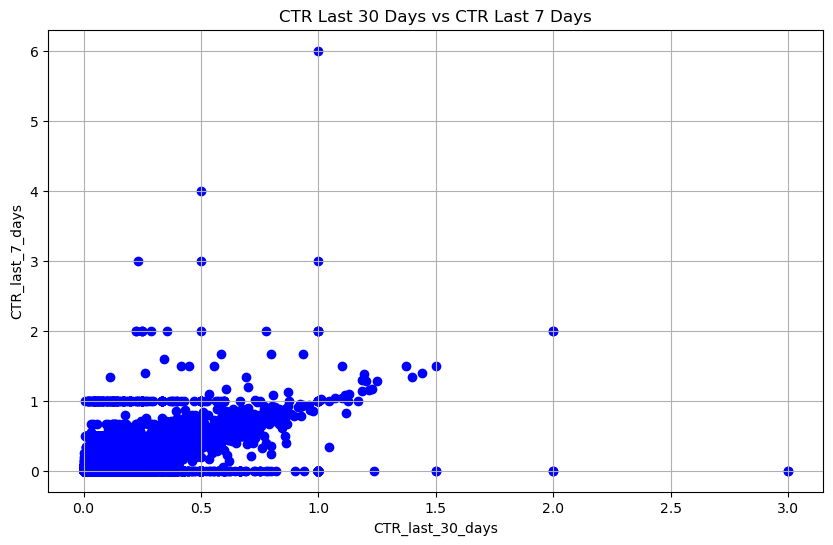

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(df['CTR_last_30_days'], df['CTR_last_7_days'], marker='o', color='blue')
plt.title('CTR Last 30 Days vs CTR Last 7 Days')
plt.xlabel('CTR_last_30_days')
plt.ylabel('CTR_last_7_days')
plt.grid(True)
plt.show()

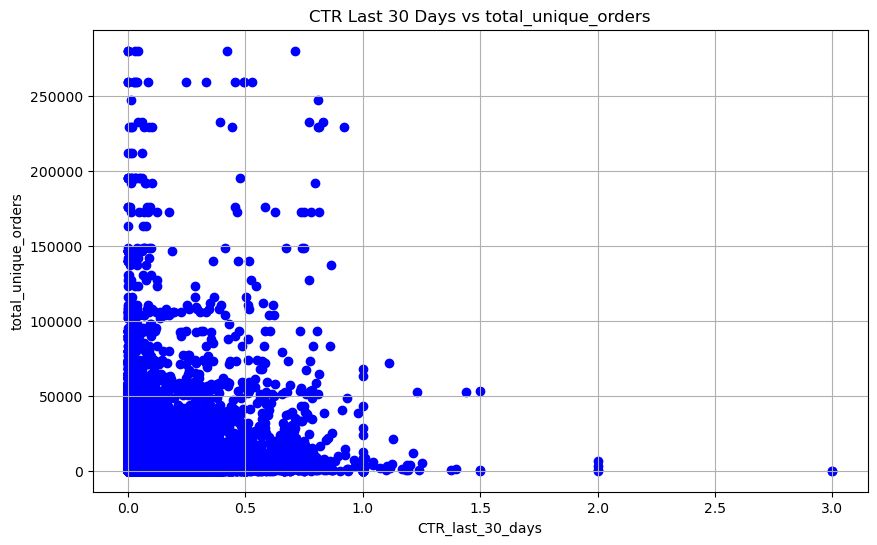

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(df['CTR_last_30_days'], df['total_unique_orders'], marker='o', color='blue')
plt.title('CTR Last 30 Days vs total_unique_orders')
plt.xlabel('CTR_last_30_days')
plt.ylabel('total_unique_orders')
plt.grid(True)
plt.show()

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ad_revenue'], df['savings'], marker='o', color='blue')
plt.title('ad_revenue vs savings')
plt.xlabel('ad_revenue')
plt.ylabel('savings')
plt.grid(True)
plt.show()

KeyError: 'ad_revenue'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# This heatmap visualizes the correlation matrix for the numerical features in the dataset. 
# The corr matrix measures the linear relationship between each pair of features. 
# The color intensity represents the strength and direction of the correlations, with darker shades indicating stronger correlations, either positive or negative. 
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
!pip install xgboost

In [52]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Creating lists with columns containing object and non-object data type
categorical_columns = df.select_dtypes(include=['object']).columns
non_categorical_columns = df.select_dtypes(exclude=['object']).columns

for col in categorical_columns:

  df[col] = df[col].astype(str)
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])

In [53]:
X=df.drop('is_clicked',axis=1)
y=df['is_clicked']

In [54]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 1.490206353974133e-10
R² Score: 0.9999999992932758
